In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

/home/taylan/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import cross_val_predict

In [ ]:
import datetime
import catboost
from catboost import CatBoostRegressor, Pool, cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

In [ ]:
train = pd.read_csv('/home/taylan/Desktop/JUPYTER/bike_demand/train.csv')
submit = pd.read_csv('/home/taylan/Desktop/JUPYTER/bike_demand/sampleSubmission.csv')
test = pd.read_csv('/home/taylan/Desktop/JUPYTER/bike_demand/test.csv')
df = pd.read_csv('df_final')
roll7 = pd.read_csv('/home/taylan/Desktop/JUPYTER/roll7')
roll60 = pd.read_csv('/home/taylan/Desktop/JUPYTER/roll60')

FileNotFoundError: [Errno 2] No such file or directory: '/home/taylan/Desktop/JUPYTER/roll7'

In [ ]:
df.drop(df.columns[0],axis=1)
df.set_index('datetime',inplace=True)

In [ ]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [ ]:
test.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027


In [ ]:
df.columns

Index(['Unnamed: 0', 'index', 'datetime', 'month', 'day', 'year', 'hour',
       'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'wind_mfill', 'wind_bfill',
       'wind_rfill'],
      dtype='object')

In [ ]:
df2 = df[['month','day','year','hour','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','count','wind_mfill','wind_bfill']]

In [ ]:
df2

,month,day,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,wind_mfill,wind_bfill
0,1,1,2011,0,1,0,0,1,9.84,14.395,81,0.0000,16,13.573741,6.0032
1,1,1,2011,1,1,0,0,1,9.02,13.635,80,0.0000,40,13.573741,6.0032
2,1,1,2011,2,1,0,0,1,9.02,13.635,80,0.0000,32,13.573741,6.0032
3,1,1,2011,3,1,0,0,1,9.84,14.395,75,0.0000,13,13.573741,6.0032
4,1,1,2011,4,1,0,0,1,9.84,14.395,75,0.0000,1,13.573741,6.0032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,12,19,2012,19,4,0,1,1,15.58,19.695,50,26.0027,336,26.002700,26.0027
8489,12,19,2012,20,4,0,1,1,14.76,17.425,57,15.0013,241,15.001300,15.0013
8490,12,19,2012,21,4,0,1,1,13.94,15.910,61,15.0013,168,15.001300,15.0013
8491,12,19,2012,22,4,0,1,1,13.94,17.425,61,6.0032,129,6.003200,6.0032


Text(0.5, 1.0, 'pearson correlation')

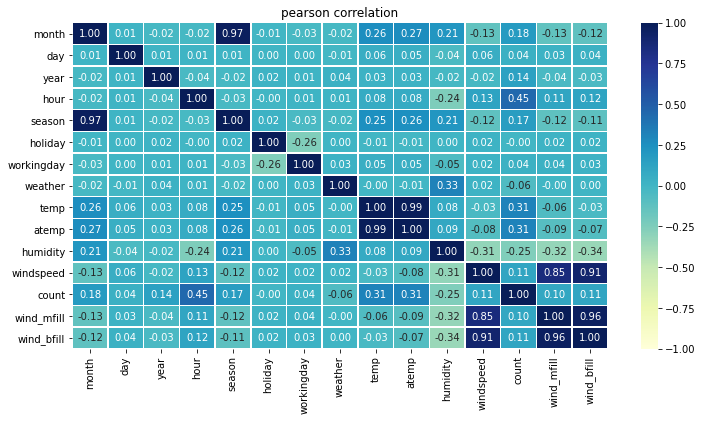

In [ ]:
plt.figure(figsize=(12,6))
corr_matrix = df2.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

In [ ]:
df_final = df.drop(['casual','registered','season','holiday','workingday','weather','year','month','hour','day'],axis=1)

In [ ]:
df_final.reset_index(inplace=True)

In [ ]:
df_final = df_final.drop(df_final.columns[0],axis=1)

In [ ]:
df_final = df_final.drop(['Unnamed: 0'],axis=1)

In [ ]:
df_final.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'wind_mean',
       'wind_mfill', 'wind_bfill', 'season_1', 'season_2', 'season_3',
       'season_4', 'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'year_2011',
       'year_2012', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [ ]:
#x = df_final.drop(['count'],axis=1).values
#y = df_final['count']

In [ ]:
def getxy(data):
    return data.drop(['count'],axis=1),data['count']

In [ ]:
x_df2 , y_df2 = getxy(df2)

In [ ]:
x_df2

,month,day,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,wind_mfill,wind_bfill
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,2011,0,1,0,0,1,9.84,14.395,81,0.0000,13.573741,6.0032
2011-01-01 01:00:00,1,1,2011,1,1,0,0,1,9.02,13.635,80,0.0000,13.573741,6.0032
2011-01-01 02:00:00,1,1,2011,2,1,0,0,1,9.02,13.635,80,0.0000,13.573741,6.0032
2011-01-01 03:00:00,1,1,2011,3,1,0,0,1,9.84,14.395,75,0.0000,13.573741,6.0032
2011-01-01 04:00:00,1,1,2011,4,1,0,0,1,9.84,14.395,75,0.0000,13.573741,6.0032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,12,19,2012,19,4,0,1,1,15.58,19.695,50,26.0027,26.002700,26.0027
2012-12-19 20:00:00,12,19,2012,20,4,0,1,1,14.76,17.425,57,15.0013,15.001300,15.0013
2012-12-19 21:00:00,12,19,2012,21,4,0,1,1,13.94,15.910,61,15.0013,15.001300,15.0013


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def feature_importance(x,y,df):
    rf = RandomForestRegressor(n_estimators=100,random_state=0)
    rf.fit(x_df2,y_df2)
    imp_list = rf.feature_importances_
    feats={}
    for feature,importance in zip(x.columns,rf.feature_importances_):   #############################x.column
        feats[feature]=importance
    return pd.DataFrame.from_dict(feats, orient='index',columns=['importance'])


In [ ]:
feats_df = feature_importance(x_df2,y_df2,df2)

In [ ]:
#feat_df = pd.DataFrame.from_dict(feats, orient='index',columns=['importance'])

In [ ]:
feats_df = feats_df.reset_index()

In [ ]:
feats_df['importance'].sort_values(ascending=False)

3     0.627041
6     0.073774
9     0.054744
8     0.053620
0     0.052336
2     0.042972
10    0.030133
7     0.018856
1     0.015367
4     0.010323
12    0.007182
11    0.006004
13    0.005699
5     0.001949
Name: importance, dtype: float64

<AxesSubplot:xlabel='index', ylabel='importance'>

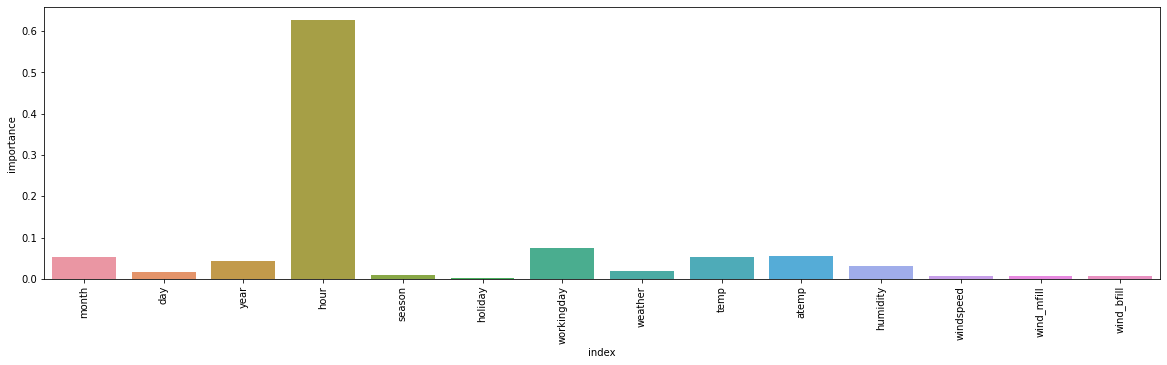

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation='vertical')
sns.barplot(x='index',y='importance', data=feats_df)

In [ ]:
ss = StandardScaler()
x_df2_std = ss.fit_transform(x_df2)

In [ ]:
df2.head()

,month,day,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,wind_mfill,wind_bfill
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,2011,0,1,0,0,1,9.84,14.395,81,0.0,16,13.573741,6.0032
2011-01-01 01:00:00,1,1,2011,1,1,0,0,1,9.02,13.635,80,0.0,40,13.573741,6.0032
2011-01-01 02:00:00,1,1,2011,2,1,0,0,1,9.02,13.635,80,0.0,32,13.573741,6.0032
2011-01-01 03:00:00,1,1,2011,3,1,0,0,1,9.84,14.395,75,0.0,13,13.573741,6.0032
2011-01-01 04:00:00,1,1,2011,4,1,0,0,1,9.84,14.395,75,0.0,1,13.573741,6.0032


In [ ]:
y_df2

datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    129
2012-12-19 23:00:00     88
Name: count, Length: 8493, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_df2_std,np.log(y_df2),random_state=0)

In [ ]:
import xgboost as xg
from sklearn.model_selection import GridSearchCV

In [ ]:
def grid_search(X,Y):
    xgr = xg.XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4)
    xgr.fit(X,Y)
    parameters = [{'subsample':[i/10 for i in range(6,10)],'colsample_bytree':[i/10 for i in range(6,10)]}]
    grid_search = GridSearchCV(estimator=xgr, param_grid = parameters, cv=3, n_jobs=-1)
    grid_search = grid_search.fit(X,Y)
    best_acc = grid_search.best_score_
    best_param = grid_search.best_params_
    
    return best_acc,best_param

In [ ]:
ba, bp =grid_search(X_train,y_train)

In [ ]:
ba

0.927201770402789

In [ ]:
bp

{'colsample_bytree': 0.8, 'subsample': 0.9}

In [ ]:
xgr = xg.XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4,subsample=0.9,colsample_bytree=0.8)
xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE 

In [ ]:
pred = xgr.predict(X_test)
pred[pred<0] = 0

In [ ]:
error = np.sqrt(MSE(y_test,pred))

In [ ]:
error

0.3659630674095626

In [ ]:
r2 = r2_score(y_test,pred)

In [ ]:
r2

0.9348742221021117

In [ ]:
msle = mean_squared_log_error(pred,y_test)

In [ ]:
rmsle = np.sqrt(msle)

In [ ]:
rmsle

0.12452825325379667

In [ ]:
X_train

array([[ 0.44594726, -0.73516147,  1.03976323, ...,  0.13474634,
        -0.08635276, -0.0169722 ],
       [ 0.72280618, -0.55298523,  1.03976323, ..., -0.41292176,
        -0.78170683, -0.67579303],
       [-1.21520628, -0.18863274, -0.96175742, ...,  0.40903907,
         0.26190664,  0.31298999],
       ...,
       [ 0.16908834, -0.0064565 ,  1.03976323, ..., -0.82298482,
        -1.30234882, -1.16908098],
       [-0.38462951, -0.37080899, -0.96175742, ..., -1.64494565,
        -0.25836556, -1.16908098],
       [-0.66148843,  1.45095345, -0.96175742, ..., -0.82298482,
        -1.30234882, -1.16908098]])

In [ ]:
y_train

5357    113
5998    344
993       7
1136     15
5155    130
       ... 
4373     59
7891     11
4859     69
3264     64
2732    184
Name: count, Length: 6369, dtype: int64

In [ ]:
x_df2_std

array([[-1.4920652 , -1.64604269, -0.96175742, ..., -1.64494565,
         0.0137357 , -1.16908098],
       [-1.4920652 , -1.64604269, -0.96175742, ..., -1.64494565,
         0.0137357 , -1.16908098],
       [-1.4920652 , -1.64604269, -0.96175742, ..., -1.64494565,
         0.0137357 , -1.16908098],
       ...,
       [ 1.55338295,  1.63312969,  1.03976323, ...,  0.40903907,
         0.26190664,  0.31298999],
       [ 1.55338295,  1.63312969,  1.03976323, ..., -0.82298482,
        -1.30234882, -1.16908098],
       [ 1.55338295,  1.63312969,  1.03976323, ..., -0.41292176,
        -0.78170683, -0.67579303]])

In [ ]:
df_final_x , df_final_y = getxy(df_final)

In [ ]:
df_final.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'wind_mean',
       'wind_mfill', 'wind_bfill', 'season_1', 'season_2', 'season_3',
       'season_4', 'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'year_2011',
       'year_2012', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [ ]:
feat_imp_final_df = feature_importance(df_final_x,df_final_y,df_final).reset_index(inplace=True)

In [ ]:
feat_imp_final_df

In [ ]:
feat_imp_final_df = pd.DataFrame.from_dict(feat_imp_final_df, orient='index',columns=['importance'])

TypeError: object of type 'NoneType' has no len()

In [ ]:
#plt.figure(figsize=(20,5))
#plt.xticks(rotation='vertical')
#sns.barplot(x='index',y='importance', data=df_final)

In [ ]:
df_final

,temp,atemp,humidity,windspeed,count,wind_mean,wind_mfill,wind_bfill,season_1,season_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,0.0000,16,13.573741,13.573741,6.0032,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0000,40,13.573741,13.573741,6.0032,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0000,32,13.573741,13.573741,6.0032,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,0.0000,13,13.573741,13.573741,6.0032,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0.0000,1,13.573741,13.573741,6.0032,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,15.58,19.695,50,26.0027,336,10.224952,26.002700,26.0027,0,0,...,0,0,0,0,0,1,0,0,0,0
8489,14.76,17.425,57,15.0013,241,10.224952,15.001300,15.0013,0,0,...,0,0,0,0,0,0,1,0,0,0
8490,13.94,15.910,61,15.0013,168,10.224952,15.001300,15.0013,0,0,...,0,0,0,0,0,0,0,1,0,0
8491,13.94,17.425,61,6.0032,129,10.224952,6.003200,6.0032,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_final.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'wind_mean',
       'wind_mfill', 'wind_bfill', 'season_1', 'season_2', 'season_3',
       'season_4', 'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'year_2011',
       'year_2012', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [ ]:
df_final_no_dummy

In [ ]:
df2

,month,day,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,wind_mfill,wind_bfill,wind_rfill
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,2011,0,1,0,0,1,9.84,14.395,81,0.0000,16,13.573741,6.0032,0.0000
2011-01-01 01:00:00,1,1,2011,1,1,0,0,1,9.02,13.635,80,0.0000,40,13.573741,6.0032,0.0000
2011-01-01 02:00:00,1,1,2011,2,1,0,0,1,9.02,13.635,80,0.0000,32,13.573741,6.0032,0.0000
2011-01-01 03:00:00,1,1,2011,3,1,0,0,1,9.84,14.395,75,0.0000,13,13.573741,6.0032,0.0000
2011-01-01 04:00:00,1,1,2011,4,1,0,0,1,9.84,14.395,75,0.0000,1,13.573741,6.0032,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,12,19,2012,19,4,0,1,1,15.58,19.695,50,26.0027,336,26.002700,26.0027,26.0027
2012-12-19 20:00:00,12,19,2012,20,4,0,1,1,14.76,17.425,57,15.0013,241,15.001300,15.0013,15.0013
2012-12-19 21:00:00,12,19,2012,21,4,0,1,1,13.94,15.910,61,15.0013,168,15.001300,15.0013,15.0013


In [ ]:
wind0 = df2[df2['windspeed']==0]
windnot0 = df2[df2['windspeed']!=0]

In [ ]:
rf = RandomForestRegressor()

In [ ]:
cols = ['month','day','year','hour','season','weather','temp','atemp','humidity']

In [ ]:
rf.fit(windnot0[cols],windnot0['windspeed'])

RandomForestRegressor()

In [ ]:
wind0values = rf.predict(X=wind0[cols])

In [ ]:
df2['wind_rfill'] = df2['windspeed']

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2['wind_rfill']

datetime
2011-01-01 00:00:00     0.0000
2011-01-01 01:00:00     0.0000
2011-01-01 02:00:00     0.0000
2011-01-01 03:00:00     0.0000
2011-01-01 04:00:00     0.0000
                        ...   
2012-12-19 19:00:00    26.0027
2012-12-19 20:00:00    15.0013
2012-12-19 21:00:00    15.0013
2012-12-19 22:00:00     6.0032
2012-12-19 23:00:00     8.9981
Name: wind_rfill, Length: 8493, dtype: float64

In [ ]:
wind00 = df2[df2['wind_rfill']==0]
windnot00 = df2[df2['wind_rfill']!=0]

In [ ]:
wind00['wind_rfill']=wind0values

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2=windnot00.append(wind00)

In [ ]:
df2

,month,day,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,wind_mfill,wind_bfill,wind_rfill
datetime,,,,,,,,,,,,,,,,
2011-01-01 05:00:00,1,1,2011,5,1,0,0,2,9.84,12.880,75,6.0032,1,6.003200,6.0032,6.003200
2011-01-01 10:00:00,1,1,2011,10,1,0,0,1,15.58,19.695,76,16.9979,36,16.997900,16.9979,16.997900
2011-01-01 11:00:00,1,1,2011,11,1,0,0,1,14.76,16.665,81,19.0012,56,19.001200,19.0012,19.001200
2011-01-01 12:00:00,1,1,2011,12,1,0,0,1,17.22,21.210,77,19.0012,84,19.001200,19.0012,19.001200
2011-01-01 13:00:00,1,1,2011,13,1,0,0,2,18.86,22.725,72,19.9995,94,19.999500,19.9995,19.999500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-17 09:00:00,12,17,2012,9,4,0,1,2,16.40,20.455,87,0.0000,282,10.224952,6.0032,7.231913
2012-12-17 12:00:00,12,17,2012,12,4,0,1,2,16.40,20.455,87,0.0000,232,10.224952,8.9981,7.991224
2012-12-17 15:00:00,12,17,2012,15,4,0,1,2,17.22,21.210,88,0.0000,211,10.224952,8.9981,7.820709


Text(0.5, 1.0, 'pearson correlation')

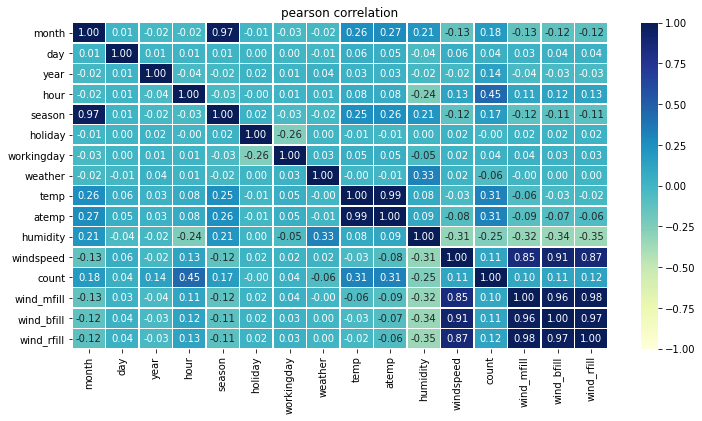

In [ ]:
plt.figure(figsize=(12,6))
corr_matrix = df2.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

In [ ]:
df2.index.sort_values

<bound method Index.sort_values of Index(['2011-01-01 05:00:00', '2011-01-01 10:00:00', '2011-01-01 11:00:00',
       '2011-01-01 12:00:00', '2011-01-01 13:00:00', '2011-01-01 14:00:00',
       '2011-01-01 15:00:00', '2011-01-01 16:00:00', '2011-01-01 17:00:00',
       '2011-01-01 18:00:00',
       ...
       '2012-12-16 20:00:00', '2012-12-16 21:00:00', '2012-12-17 00:00:00',
       '2012-12-17 03:00:00', '2012-12-17 05:00:00', '2012-12-17 09:00:00',
       '2012-12-17 12:00:00', '2012-12-17 15:00:00', '2012-12-18 22:00:00',
       '2012-12-19 00:00:00'],
      dtype='object', name='datetime', length=8493)>

In [ ]:
df2[(df2['month']==1)&(df2['day']==1)&(df2['year']==2011)&(df2['hour']==0)]

,month,day,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,wind_mfill,wind_bfill,wind_rfill
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,2011,0,1,0,0,1,9.84,14.395,81,0.0,16,13.573741,6.0032,8.291786


In [ ]:
df2.head()

,month,day,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,wind_mfill,wind_bfill,wind_rfill
datetime,,,,,,,,,,,,,,,,
2011-01-01 05:00:00,1,1,2011,5,1,0,0,2,9.84,12.880,75,6.0032,1,6.0032,6.0032,6.0032
2011-01-01 10:00:00,1,1,2011,10,1,0,0,1,15.58,19.695,76,16.9979,36,16.9979,16.9979,16.9979
2011-01-01 11:00:00,1,1,2011,11,1,0,0,1,14.76,16.665,81,19.0012,56,19.0012,19.0012,19.0012
2011-01-01 12:00:00,1,1,2011,12,1,0,0,1,17.22,21.210,77,19.0012,84,19.0012,19.0012,19.0012
2011-01-01 13:00:00,1,1,2011,13,1,0,0,2,18.86,22.725,72,19.9995,94,19.9995,19.9995,19.9995


In [ ]:
df2.reset_index(inplace=True)

In [ ]:
dff = df2.copy()

In [ ]:
df2 = df2.sort_values('datetime')

In [ ]:
df2.set_index('datetime',inplace=True)

In [ ]:
df2

,month,day,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,wind_mfill,wind_bfill,wind_rfill
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,2011,0,1,0,0,1,9.84,14.395,81,0.0000,16,13.573741,6.0032,8.291786
2011-01-01 01:00:00,1,1,2011,1,1,0,0,1,9.02,13.635,80,0.0000,40,13.573741,6.0032,8.281870
2011-01-01 02:00:00,1,1,2011,2,1,0,0,1,9.02,13.635,80,0.0000,32,13.573741,6.0032,8.061976
2011-01-01 03:00:00,1,1,2011,3,1,0,0,1,9.84,14.395,75,0.0000,13,13.573741,6.0032,7.741984
2011-01-01 04:00:00,1,1,2011,4,1,0,0,1,9.84,14.395,75,0.0000,1,13.573741,6.0032,7.621853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,12,19,2012,19,4,0,1,1,15.58,19.695,50,26.0027,336,26.002700,26.0027,26.002700
2012-12-19 20:00:00,12,19,2012,20,4,0,1,1,14.76,17.425,57,15.0013,241,15.001300,15.0013,15.001300
2012-12-19 21:00:00,12,19,2012,21,4,0,1,1,13.94,15.910,61,15.0013,168,15.001300,15.0013,15.001300


In [ ]:
cat_var = ['month','day','year','hour','season','holiday','workingday']
num_var = ['temp','atemp','humidity','windspeed','count','wind_mfill','wind_bfill','wind_rfill']

In [ ]:
df_weekly_mean = df2[num_var].rolling(window=7,center=True).mean()

In [ ]:
df_weekly_mean.head(10)

,temp,atemp,humidity,windspeed,count,wind_mfill,wind_bfill,wind_rfill
datetime,,,,,,,,
2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 03:00:00,9.488571,13.852857,78.000000,0.857600,15.000000,12.492235,7.573871,7.776288
2011-01-01 04:00:00,9.254286,13.636429,78.714286,0.857600,13.142857,12.492235,9.144543,7.881928
2011-01-01 05:00:00,9.371429,13.745000,78.000000,0.857600,8.571429,12.492235,10.715214,8.281841
2011-01-01 06:00:00,9.957143,14.286429,77.428571,0.857600,6.000000,12.492235,12.285886,8.983035
2011-01-01 07:00:00,10.777143,15.043571,77.571429,3.285871,9.285714,12.981401,13.856557,10.305308
2011-01-01 08:00:00,11.480000,15.367857,78.428571,6.000329,17.142857,13.756752,15.713414,11.930929


In [ ]:
df_weekly_mean

,temp,atemp,humidity,windspeed,count,wind_mfill,wind_bfill,wind_rfill
datetime,,,,,,,,
2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 03:00:00,9.488571,13.852857,78.000000,0.857600,15.000000,12.492235,7.573871,7.776288
2011-01-01 04:00:00,9.254286,13.636429,78.714286,0.857600,13.142857,12.492235,9.144543,7.881928
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,15.697143,19.155000,54.142857,16.858157,237.571429,16.858157,16.858157,16.858157
2012-12-19 20:00:00,15.111429,18.505714,56.428571,16.286743,219.000000,16.286743,16.286743,16.286743
2012-12-19 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_weekly_mean_nonan = df_weekly_mean.dropna()

In [ ]:
df_weekly_mean_nonan.shape

(8487, 8)

In [ ]:
df2_rolling_7 = df_weekly_mean_nonan.copy()

In [ ]:
df2

,month,day,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,wind_mfill,wind_bfill,wind_rfill
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,2011,0,1,0,0,1,9.84,14.395,81,0.0000,16,13.573741,6.0032,8.291786
2011-01-01 01:00:00,1,1,2011,1,1,0,0,1,9.02,13.635,80,0.0000,40,13.573741,6.0032,8.281870
2011-01-01 02:00:00,1,1,2011,2,1,0,0,1,9.02,13.635,80,0.0000,32,13.573741,6.0032,8.061976
2011-01-01 03:00:00,1,1,2011,3,1,0,0,1,9.84,14.395,75,0.0000,13,13.573741,6.0032,7.741984
2011-01-01 04:00:00,1,1,2011,4,1,0,0,1,9.84,14.395,75,0.0000,1,13.573741,6.0032,7.621853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,12,19,2012,19,4,0,1,1,15.58,19.695,50,26.0027,336,26.002700,26.0027,26.002700
2012-12-19 20:00:00,12,19,2012,20,4,0,1,1,14.76,17.425,57,15.0013,241,15.001300,15.0013,15.001300
2012-12-19 21:00:00,12,19,2012,21,4,0,1,1,13.94,15.910,61,15.0013,168,15.001300,15.0013,15.001300


In [ ]:
df2_rolling_7 = df2_rolling_7.drop(['count'],axis=1)

In [ ]:
df2_rolling_7 = df2_rolling_7.rename(columns={'temp':'temp_roll7','atemp':'atemp_roll7','humidity':'humidity_roll7','windspeed':'windspeed_roll7','wind_mfill':'wind_mfill_roll7','wind_bfill':'wind_bfill_roll7','wind_rfill':'wind_rfill_roll7'})

In [ ]:
df2_rolling_7

,temp_roll7,atemp_roll7,humidity_roll7,windspeed_roll7,wind_mfill_roll7,wind_bfill_roll7,wind_rfill_roll7
datetime,,,,,,,
2011-01-01 03:00:00,9.488571,13.852857,78.000000,0.857600,12.492235,7.573871,7.776288
2011-01-01 04:00:00,9.254286,13.636429,78.714286,0.857600,12.492235,9.144543,7.881928
2011-01-01 05:00:00,9.371429,13.745000,78.000000,0.857600,12.492235,10.715214,8.281841
2011-01-01 06:00:00,9.957143,14.286429,77.428571,0.857600,12.492235,12.285886,8.983035
2011-01-01 07:00:00,10.777143,15.043571,77.571429,3.285871,12.981401,13.856557,10.305308
...,...,...,...,...,...,...,...
2012-12-19 14:00:00,16.751429,20.777857,51.142857,18.428829,18.428829,18.428829,18.428829
2012-12-19 15:00:00,16.517143,20.345000,51.571429,18.428829,18.428829,18.428829,18.428829
2012-12-19 16:00:00,16.165714,19.695714,52.571429,17.857414,17.857414,17.857414,17.857414


In [ ]:
df3

,month,day,year,hour,season,holiday,workingday,weather,temp,atemp,...,wind_mfill,wind_bfill,wind_rfill,temp_roll7,atemp_roll7,humidity_roll7,windspeed_roll7,wind_mfill_roll7,wind_bfill_roll7,wind_rfill_roll7
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,2011,0,1,0,0,1,9.84,14.395,...,13.573741,6.0032,8.291786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,1,1,2011,1,1,0,0,1,9.02,13.635,...,13.573741,6.0032,8.281870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00,1,1,2011,2,1,0,0,1,9.02,13.635,...,13.573741,6.0032,8.061976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 03:00:00,1,1,2011,3,1,0,0,1,9.84,14.395,...,13.573741,6.0032,7.741984,9.488571,13.852857,78.000000,0.857600,12.492235,7.573871,7.776288
2011-01-01 04:00:00,1,1,2011,4,1,0,0,1,9.84,14.395,...,13.573741,6.0032,7.621853,9.254286,13.636429,78.714286,0.857600,12.492235,9.144543,7.881928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,12,19,2012,19,4,0,1,1,15.58,19.695,...,26.002700,26.0027,26.002700,15.697143,19.155000,54.142857,16.858157,16.858157,16.858157,16.858157
2012-12-19 20:00:00,12,19,2012,20,4,0,1,1,14.76,17.425,...,15.001300,15.0013,15.001300,15.111429,18.505714,56.428571,16.286743,16.286743,16.286743,16.286743
2012-12-19 21:00:00,12,19,2012,21,4,0,1,1,13.94,15.910,...,15.001300,15.0013,15.001300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2_rolling_60 = df2[num_var].rolling(window=60,center=True).mean()

In [ ]:
df2_rolling_60.drop(['count'],axis=1)

,temp_roll60,atemp_roll60,humidity_roll60,windspeed_roll60,wind_mfill_roll60,wind_bfill_roll60,wind_rfill_roll60
datetime,,,,,,,
2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2012-12-19 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-19 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-19 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3 = pd.merge(df2,df2_rolling_7,how='outer',on='datetime')

In [ ]:
df2_rolling_60 = df2_rolling_60.rename(columns={'temp':'temp_roll60','atemp':'atemp_roll60','humidity':'humidity_roll60','windspeed':'windspeed_roll60','wind_mfill':'wind_mfill_roll60','wind_bfill':'wind_bfill_roll60','wind_rfill':'wind_rfill_roll60'})

In [ ]:
df2

,month,day,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,wind_mfill,wind_bfill,wind_rfill
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,2011,0,1,0,0,1,9.84,14.395,81,0.0000,16,13.573741,6.0032,8.291786
2011-01-01 01:00:00,1,1,2011,1,1,0,0,1,9.02,13.635,80,0.0000,40,13.573741,6.0032,8.281870
2011-01-01 02:00:00,1,1,2011,2,1,0,0,1,9.02,13.635,80,0.0000,32,13.573741,6.0032,8.061976
2011-01-01 03:00:00,1,1,2011,3,1,0,0,1,9.84,14.395,75,0.0000,13,13.573741,6.0032,7.741984
2011-01-01 04:00:00,1,1,2011,4,1,0,0,1,9.84,14.395,75,0.0000,1,13.573741,6.0032,7.621853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,12,19,2012,19,4,0,1,1,15.58,19.695,50,26.0027,336,26.002700,26.0027,26.002700
2012-12-19 20:00:00,12,19,2012,20,4,0,1,1,14.76,17.425,57,15.0013,241,15.001300,15.0013,15.001300
2012-12-19 21:00:00,12,19,2012,21,4,0,1,1,13.94,15.910,61,15.0013,168,15.001300,15.0013,15.001300


In [ ]:
df2_rolling_7.to_csv('roll7')
df2_rolling_60.to_csv('roll60')

In [ ]:
df2.reset_index(inplace=True)

In [ ]:
df2.to_csv('df_final')

In [ ]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

#ONE GOT ENCODER


In [ ]:
d = pd.read_csv('df_final')